In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dsc import sex_dummies

"Loading data and checking information"
df =pd.read_csv("./heart.csv")
# print(df.info())
print(df.head())
print(df.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


target
1    165
0    138
Name: count, dtype: int64


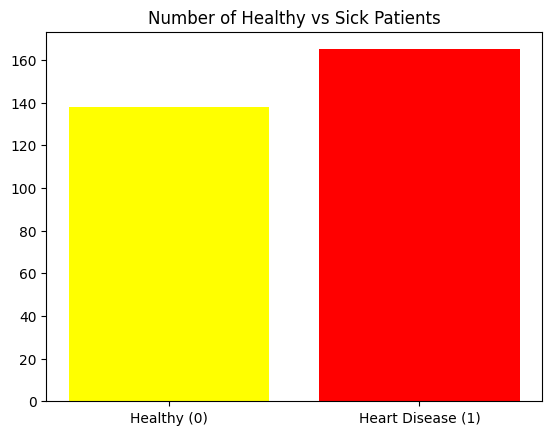

In [12]:
"Plotting bar chart for healthy vs sick patients"
counts = df["target"].value_counts()
print(counts)
plt.bar(counts.index, counts.values, color=["red","yellow"])
plt.xticks([0,1], ["Healthy (0)", "Heart Disease (1)"])
plt.title("Number of Healthy vs Sick Patients")
plt.show()

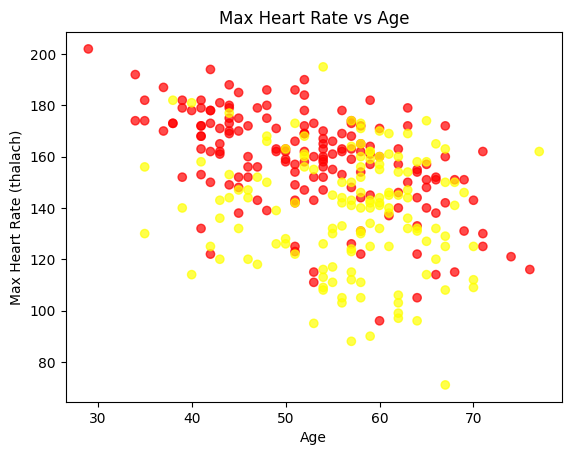

In [26]:
"Scatter plot for thalach vs age"
colors = np.where(df["target"]==1, "red", "yellow") # 1->red, 0->yellow

plt.scatter(df["age"], df["thalach"], c=colors, alpha=0.7)
plt.title("Max Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

In [27]:
"Transforming sex column and applying one-hot encoding"
df["sex"] = df["sex"].map({0: "female", 1: "male"})
print(df[["sex"]].head())

"One-hot encoding manually with pandas"
sex_dummies = pd.get_dummies(df["sex"])
df = pd.concat([df, sex_dummies], axis=1)
print(df.head())

      sex
0    male
1    male
2  female
3    male
4  female
   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   3       145   233    1        0      150      0      2.3   
1   37    male   2       130   250    0        1      187      0      3.5   
2   41  female   1       130   204    0        0      172      0      1.4   
3   56    male   1       120   236    0        1      178      0      0.8   
4   57  female   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  female   male  
0      0   0     1       1   False   True  
1      0   0     2       1   False   True  
2      2   0     2       1    True  False  
3      2   0     2       1   False   True  
4      2   0     2       1    True  False  


In [28]:
"Average cholesterol level for health vs sich patients"
chol_mean = df.groupby("target")["chol"].mean()
print(chol_mean)

target
0    251.086957
1    242.230303
Name: chol, dtype: float64


In [29]:
"Normalization of selected features (min-max) scaling manually"
features_norm = ["age", "trestbps", "chol", "thalach"]
df[features_norm] = (df[features_norm] - df[features_norm].min()) / (df[features_norm].max() - df[features_norm].min())
print(df[features_norm].describe())


              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean     0.528465    0.354941    0.274575    0.600358
std      0.189210    0.165454    0.118335    0.174849
min      0.000000    0.000000    0.000000    0.000000
25%      0.385417    0.245283    0.194064    0.477099
50%      0.541667    0.339623    0.260274    0.625954
75%      0.666667    0.433962    0.339041    0.725191
max      1.000000    1.000000    1.000000    1.000000
